In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.1678,0.1397,0.05087,0.3282,0.08490
410,11.360,17.57,72.49,399.8,0.08858,0.05313,0.02783,0.02100,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.1811,0.08698,0.2973,0.07745
264,17.190,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.05580,...,21.58,29.33,140.50,1436.0,0.15580,0.2567,0.3889,0.19840,0.3216,0.07570
498,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.14120,0.3089,0.3533,0.16630,0.2510,0.09445
509,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,...,17.11,36.33,117.70,909.4,0.17320,0.4967,0.5911,0.21630,0.3013,0.10670


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df,cancer['target'],train_size=0.8)

In [10]:
from sklearn.svm import SVC

model = SVC()

In [11]:
model.fit(X_train,y_train)

SVC()

In [12]:
model.score(X_test,y_test)

0.8859649122807017

In [13]:
predictions = model.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1])

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81        40
           1       0.86      0.99      0.92        74

    accuracy                           0.89       114
   macro avg       0.91      0.84      0.86       114
weighted avg       0.90      0.89      0.88       114



In [16]:
confuse = confusion_matrix(y_test,predictions)
confuse

array([[28, 12],
       [ 1, 73]], dtype=int64)

<AxesSubplot:>

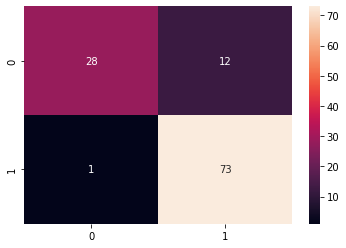

In [17]:
sns.heatmap(confuse,annot=True)

In [19]:
from sklearn.model_selection import GridSearchCV

In [21]:
grid_param = {'C':[0.1,1,10,100,1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

In [22]:
grid = GridSearchCV(SVC(),grid_param,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.615 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.615 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.626 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.626 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.626 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.615 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.615 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.626 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.626 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.626 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.615 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.615 total time=   0.0s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.626 total time=   0.0s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.626 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.626 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.615 total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.615 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.626 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.626 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.626 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.615 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.615 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.626 total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [24]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [25]:
grid.best_score_

0.9428571428571428

In [26]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [27]:
grid_predictions = grid.predict(X_test)

In [28]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        40
           1       0.91      0.97      0.94        74

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



<AxesSubplot:>

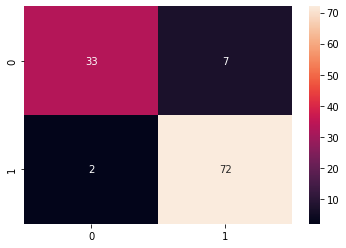

In [29]:
sns.heatmap(confusion_matrix(y_test,grid_predictions),annot=True)